# CMPE 256 Final Project: Link Prediction

Method 2: Logistic Regression using Resource Allocation Index and Preferential Attachment Score as features 

### Importing necessary libraries

In [1]:
import networkx as nx
import pandas as pd
from sklearn.model_selection import train_test_split
import random

### Loading the graph dataset

In [2]:
edge_list = pd.read_csv('PP-Pathways_ppi.csv', header = None)

In [3]:
G = nx.from_pandas_edgelist(edge_list,  0,  1)

### Fetching Resource Allocation Index for negative and positive samples (i.e no edge vs edge)

In [4]:
rsi_negative = nx.resource_allocation_index(G)

In [5]:
rsi_positive = nx.resource_allocation_index(G, G.edges)

In [6]:
rsi_neg_df = pd.DataFrame(columns=['u', 'v', 'rsi'])

In [7]:
num_samples = 50000

In [8]:
curr_index = 0

for u, v, p in rsi_negative:
  rsi_neg_df.at[curr_index, 'u'] = u
  rsi_neg_df.at[curr_index, 'v'] = v
  rsi_neg_df.at[curr_index, 'rsi'] = p
  curr_index += 1

  if curr_index >= num_samples:
    break

In [9]:
neg_edge_list = []

for index, row in rsi_neg_df.iterrows():
  u = row['u']
  v = row['v']
  neg_edge_list.append((u, v))

In [10]:
rsi_pos_df = pd.DataFrame(columns=['u', 'v', 'rsi'])

In [11]:
curr_index = 0

for u, v, p in rsi_positive:
  rsi_pos_df.at[curr_index, 'u'] = u
  rsi_pos_df.at[curr_index, 'v'] = v
  rsi_pos_df.at[curr_index, 'rsi'] = p
  curr_index += 1

  if curr_index >= num_samples:
    break

In [12]:
pos_edge_list = []

for index, row in rsi_pos_df.iterrows():
  u = row['u']
  v = row['v']
  pos_edge_list.append((u, v))

### Fetching Preferential Attachment Scores for positive and negative samples

In [14]:
pas_positive = nx.preferential_attachment(G, pos_edge_list)

In [15]:
pas_pos_df = pd.DataFrame(columns=['u', 'v', 'pas'])

In [16]:
curr_index = 0

for u, v, p in pas_positive:
  pas_pos_df.at[curr_index, 'u'] = u
  pas_pos_df.at[curr_index, 'v'] = v
  pas_pos_df.at[curr_index, 'pas'] = p
  curr_index += 1

  if curr_index >= num_samples:
    break

In [17]:
pas_pos_df.head(10)

,u,v,pas
0,1394,2778,1176
1,1394,808,1584
2,1394,801,6288
3,1394,7349,72
4,1394,2770,1284
5,1394,805,2088
6,1394,29151,12
7,1394,114131,60
8,1394,2775,660
9,1394,6732,4188


In [18]:
pas_negetive = nx.preferential_attachment(G, neg_edge_list)

In [19]:
pas_neg_df = pd.DataFrame(columns=['u', 'v', 'pas'])

In [20]:
curr_index = 0

for u, v, p in pas_negetive:
  pas_neg_df.at[curr_index, 'u'] = u
  pas_neg_df.at[curr_index, 'v'] = v
  pas_neg_df.at[curr_index, 'pas'] = p
  curr_index += 1

  if curr_index >= num_samples:
    break

In [21]:
pas_neg_df.head(10)

,u,v,pas
0,1,2,1260
1,1,131076,132
2,1,851975,12
3,1,9,72
4,1,10,288
5,1,851978,12
6,1,12,396
7,1,13,12
8,1,14,372
9,1,15,132


### Building the final dataset with features + target

In [22]:
combined_df = pd.DataFrame(columns=['rsi', 'pas', 'target'])

In [23]:
curr_index = 0

for i in range(num_samples):
  rsi = rsi_pos_df.at[i, 'rsi']
  pas = pas_pos_df.at[i, 'pas']  
  combined_df.at[i, 'rsi'] = rsi
  combined_df.at[i, 'pas'] = pas
  combined_df.at[i, 'target'] = 1


In [24]:
combined_df.head(10)

,rsi,pas,target
0,0.013144,1176,1
1,0,1584,1
2,0.010204,6288,1
3,0,72,1
4,0.018182,1284,1
5,0,2088,1
6,0,12,1
7,0,60,1
8,0.009346,660,1
9,0,4188,1


In [25]:
curr_index = num_samples

for i in range(num_samples):
  rsi = rsi_neg_df.at[i, 'rsi']
  pas = pas_neg_df.at[i, 'pas']  
  combined_df.at[curr_index + i, 'rsi'] = rsi
  combined_df.at[curr_index + i, 'pas'] = pas
  combined_df.at[curr_index + i, 'target'] = 0

In [26]:
combined_df.shape

(100000, 3)

In [27]:
X = combined_df[['rsi', 'pas']]
y = combined_df['target']

### Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 50)

In [29]:
y_train

45169    1
93216    0
43109    1
53520    0
81493    0
        ..
55366    0
59358    0
48417    1
22637    1
14000    1
Name: target, Length: 80000, dtype: object

In [30]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

### Scaling X_train and X_test using StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

### Logistic regressor with no penalty

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [33]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F-1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.86465
Precision: 0.9358156028368795
Recall: 0.7853387560757862
F-1 Score: 0.8539992449166712


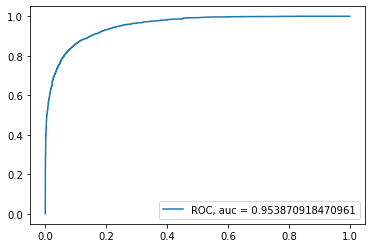

In [34]:
import matplotlib.pyplot as plt

y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "ROC, auc = " + str(auc))
plt.legend(loc=4)
plt.show()

### Logistic regressor with L2 penalty

In [35]:
logreg = LogisticRegression(penalty='l2', C = 0.01)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [36]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F-1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.86465
Precision: 0.9358156028368795
Recall: 0.7853387560757862
F-1 Score: 0.8539992449166712


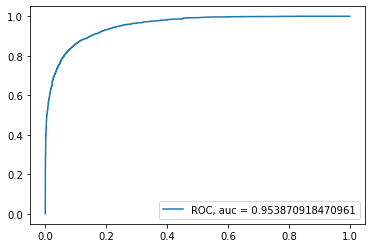

In [37]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "ROC, auc = " + str(auc))
plt.legend(loc=4)
plt.show()

### Logistic regressor with L1 penalty

In [38]:
logreg = LogisticRegression(penalty='l1', C = 0.1, solver='liblinear', max_iter=1500)

logreg.fit(X_train_std, y_train)

y_pred = logreg.predict(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [39]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F-1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.79225
Precision: 0.9887825800065985
Recall: 0.5945838706477532
F-1 Score: 0.742612897230998


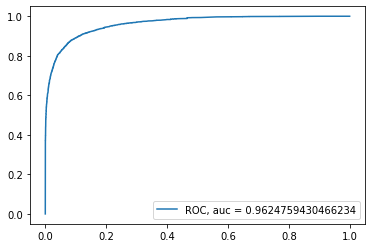

In [40]:
y_pred_proba = logreg.predict_proba(X_test_std)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "ROC, auc = " + str(auc))
plt.legend(loc=4)
plt.show()